In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

## PHASE 1:Data Processing

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

#### Utiliser le label encoding pour la colonne gender pour obtenir des valeur numérique

In [7]:
# Initialisation de l'encodeur
le = LabelEncoder()

# Transformation de la colonne "Genre"
data['Gender'] = le.fit_transform(data['Gender'])

print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


## PHASE 2: Visualisation des données

#### Analyse univariée (distribution de chaque variable)

##### Age : Visualisation de la distribution des âges des clients.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

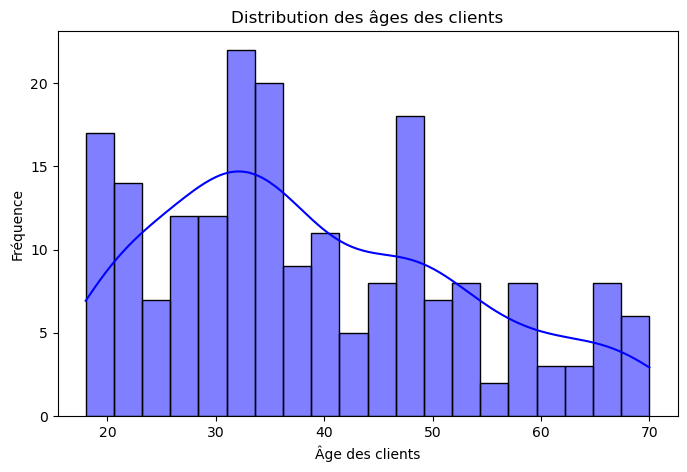

In [9]:
# Création de l'histogramme pour la distribution des âges
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')

# Ajouter des labels et un titre
plt.xlabel("Âge des clients")
plt.ylabel("Fréquence")  # Nombre de clients dans chaque intervalle d'âge
plt.title("Distribution des âges des clients")

# Afficher le graphique
plt.show()


#### Annual Income (k$) : Analyse des revenus pour identifier les valeurs extrêmes.

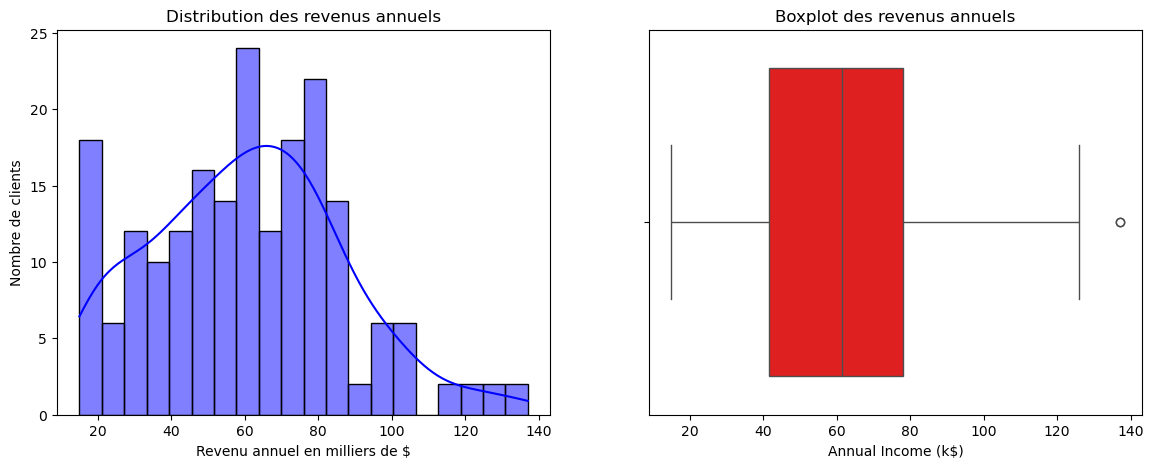

In [10]:
# Créer une figure pour afficher plusieurs graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1️⃣ Histogramme pour voir la distribution des revenus
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Distribution des revenus annuels")
axes[0].set_xlabel("Revenu annuel en milliers de $")
axes[0].set_ylabel("Nombre de clients")

# 2️⃣ Boxplot pour détecter les valeurs extrêmes
sns.boxplot(x=data['Annual Income (k$)'], color='red', ax=axes[1])
axes[1].set_title("Boxplot des revenus annuels")

# Afficher les graphiques
plt.show()

#### Spending Score (1-100) : Vérification de la répartition des scores de dépenses.

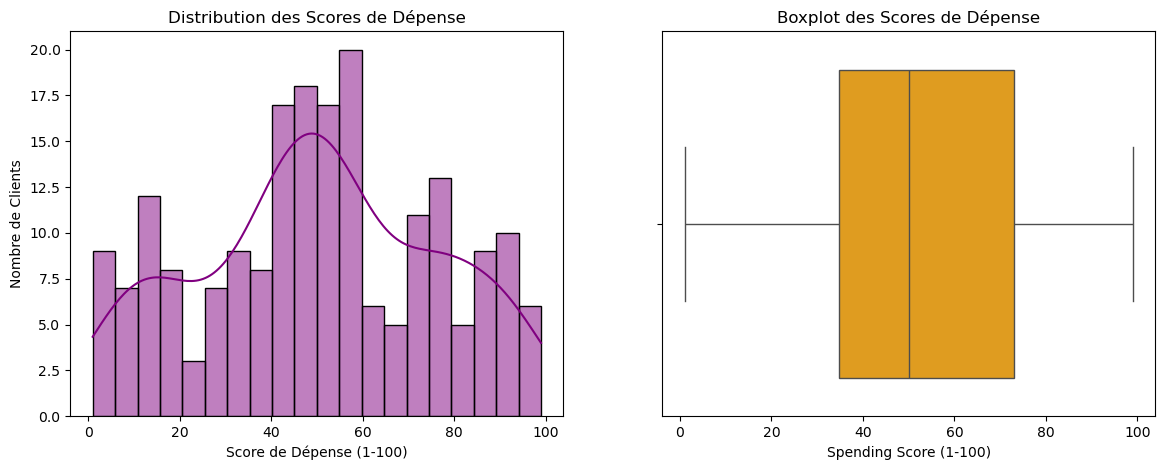

In [11]:
# Création de la figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1️⃣ Histogramme de la répartition des scores de dépenses
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, color='purple', ax=axes[0])
axes[0].set_title("Distribution des Scores de Dépense")
axes[0].set_xlabel("Score de Dépense (1-100)")
axes[0].set_ylabel("Nombre de Clients")

# 2️⃣ Boxplot pour identifier les valeurs extrêmes
sns.boxplot(x=data['Spending Score (1-100)'], color='orange', ax=axes[1])
axes[1].set_title("Boxplot des Scores de Dépense")

# Afficher les graphiques
plt.show()

### Analyse bivariée (corrélation entre variables) :

##### Annual Income vs. Spending Score : Identifier les comportements d’achats inhabituels (ex : revenu faible mais score de dépense élevé).

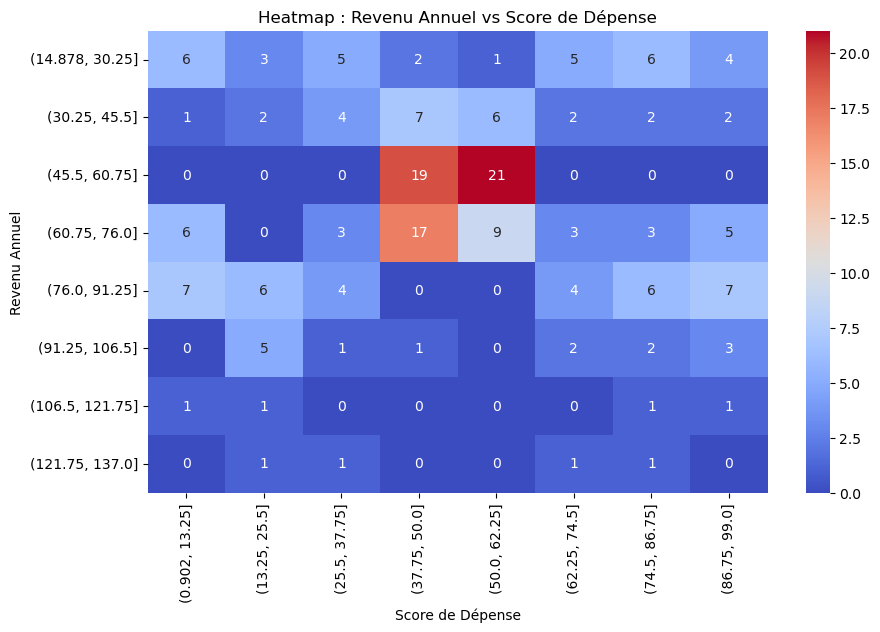

In [12]:
# Création de la heatmap avec des catégories de revenu et de dépenses
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(pd.cut(data["Annual Income (k$)"], bins=8), pd.cut(data["Spending Score (1-100)"], bins=8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d")

# Ajouter des titres et labels
plt.title("Heatmap : Revenu Annuel vs Score de Dépense")
plt.xlabel("Score de Dépense")
plt.ylabel("Revenu Annuel")

# Afficher le graphique
plt.show()

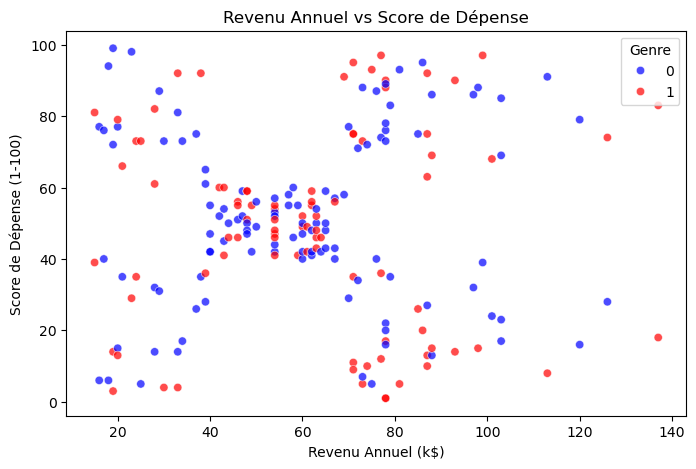

In [13]:
# Création du scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", palette=["blue", "red"], alpha=0.7)

# Ajouter des titres et labels
plt.title("Revenu Annuel vs Score de Dépense")
plt.xlabel("Revenu Annuel (k$)")
plt.ylabel("Score de Dépense (1-100)")
plt.legend(title="Genre")

# Afficher le graphique
plt.show()

#### Age vs. Spending Score : Voir si certaines tranches d’âges ont un comportement anormal.

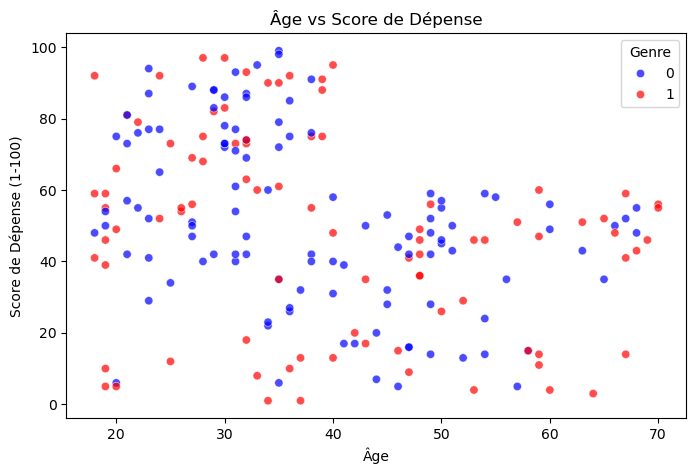

In [14]:
# Création du scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="Age", y="Spending Score (1-100)", hue="Gender", palette=["blue", "red"], alpha=0.7)

# Ajouter des titres et labels
plt.title("Âge vs Score de Dépense")
plt.xlabel("Âge")
plt.ylabel("Score de Dépense (1-100)")
plt.legend(title="Genre")

# Afficher le graphique
plt.show()

C:\Users\SURFACEBOOK\AppData\Local\Temp\ipykernel_13680\2399592766.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.cut(data["Age"], bins=[15, 25, 35, 45, 55, 65, 100]), y=data["Spending Score (1-100)"], palette="coolwarm")
C:\Users\SURFACEBOOK\AppData\Local\Temp\ipykernel_13680\2399592766.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=pd.cut(data["Age"], bins=[15, 25, 35, 45, 55, 65, 100]), y=data["Spending Score (1-100)"], palette="coolwarm")


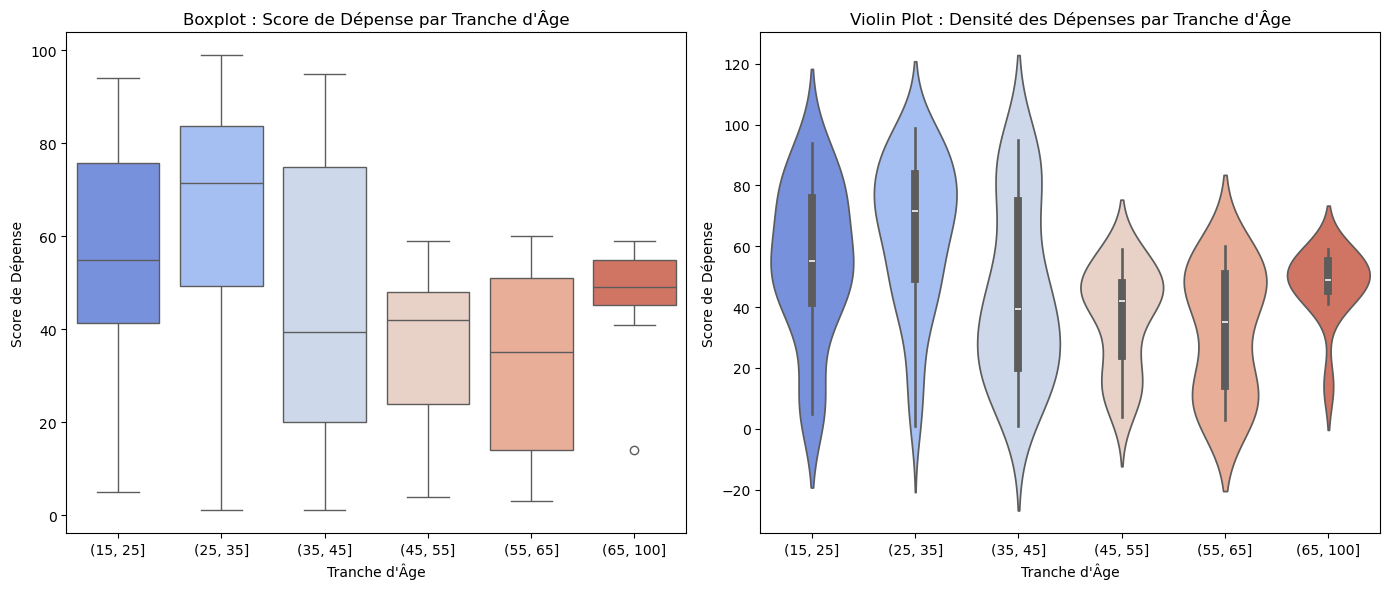

In [15]:
# Définition de la figure
plt.figure(figsize=(14, 6))

# 1️⃣ Boxplot : Répartition des scores par tranche d'âge
plt.subplot(1, 2, 1)
sns.boxplot(x=pd.cut(data["Age"], bins=[15, 25, 35, 45, 55, 65, 100]), y=data["Spending Score (1-100)"], palette="coolwarm")
plt.title("Boxplot : Score de Dépense par Tranche d'Âge")
plt.xlabel("Tranche d'Âge")
plt.ylabel("Score de Dépense")

# 2️⃣ Violin Plot : Densité des scores de dépense selon l'âge
plt.subplot(1, 2, 2)
sns.violinplot(x=pd.cut(data["Age"], bins=[15, 25, 35, 45, 55, 65, 100]), y=data["Spending Score (1-100)"], palette="coolwarm")
plt.title("Violin Plot : Densité des Dépenses par Tranche d'Âge")
plt.xlabel("Tranche d'Âge")
plt.ylabel("Score de Dépense")

# Afficher les graphiques
plt.tight_layout()
plt.show()

#### Gender vs. Spending Score : Vérifier si les habitudes de consommation varient selon le genre.

C:\Users\SURFACEBOOK\AppData\Local\Temp\ipykernel_13680\2631518168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Spending Score (1-100)", data=data, palette="pastel")
C:\Users\SURFACEBOOK\AppData\Local\Temp\ipykernel_13680\2631518168.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender", y="Spending Score (1-100)", data=data, palette="muted")


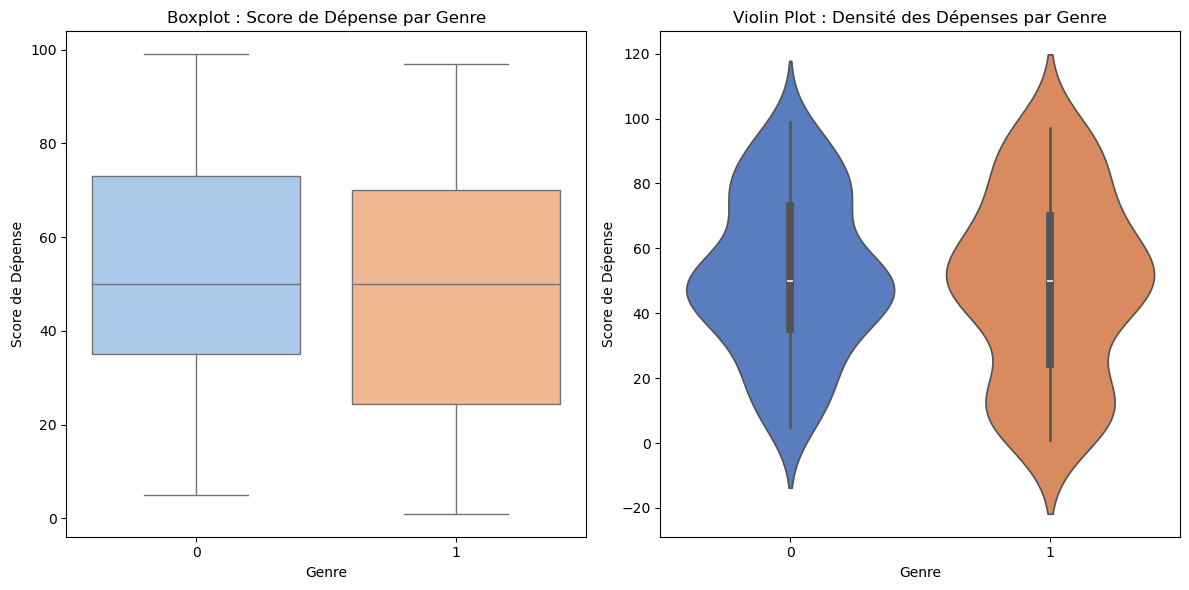

In [16]:
# Définition de la figure
plt.figure(figsize=(12, 6))

# 1️⃣ Boxplot : Répartition du score de dépense selon le genre
plt.subplot(1, 2, 1)
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=data, palette="pastel")
plt.title("Boxplot : Score de Dépense par Genre")
plt.xlabel("Genre")
plt.ylabel("Score de Dépense")

# 2️⃣ Violin Plot : Densité des scores de dépense selon le genre
plt.subplot(1, 2, 2)
sns.violinplot(x="Gender", y="Spending Score (1-100)", data=data, palette="muted")
plt.title("Violin Plot : Densité des Dépenses par Genre")
plt.xlabel("Genre")
plt.ylabel("Score de Dépense")

# Afficher les graphiques
plt.tight_layout()
plt.show()


#### Un client avec un faible revenu a un score de dépense très élevé.
Un client avec un revenu très élevé a un score de dépense très bas.
Il existe des valeurs extrêmes ou incohérentes dans les données.
Des comportements inhabituels ou rares apparaissent dans les clusters.


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [18]:
# Supprimer CustomerID car il n'est pas utile
if 'CustomerID' in data.columns:
    data = data.drop(columns=['CustomerID'])

In [21]:
# Définir la colonne 'fraud' en fonction de certaines règles
# Exemples de règles basées sur le revenu et le score de dépenses
data['fraud'] = ((data['Annual Income (k$)'] > data['Annual Income (k$)'].quantile(0.75)) & (data['Spending Score (1-100)'] < data['Spending Score (1-100)'].quantile(0.25))) |((data['Annual Income (k$)'] < data['Annual Income (k$)'].quantile(0.25)) & (data['Spending Score (1-100)'] > data['Spending Score (1-100)'].quantile(0.75)))
data['fraud'] = data['fraud'].astype(int)

In [22]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),fraud
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0


#### la colonne "fraud" est une variable binaire (0 ou 1) qui indique si une transaction ou un profil est suspecté de fraude selon des règles définies dans le code :

1 (fraude détectée) : Si le revenu annuel est élevé (au-dessus du 3ᵉ quartile) et que le score de dépenses est bas (en dessous du 1ᵉʳ quartile), ou si le revenu est faible (en dessous du 1ᵉʳ quartile) et le score de dépenses est élevé (au-dessus du 3ᵉ quartile).
0 (pas de fraude) : Si le profil ne correspond pas à ces critères.

In [23]:
# Séparer les caractéristiques (X) et la cible (y)
X = data.drop(columns=['fraud'])
y = data['fraud']

In [24]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Implémenter la régression logistique
model = LogisticRegression(C=1.0, random_state=42, class_weight='balanced')  # Gestion du déséquilibre des classes

In [27]:
# Entraîner le modèle
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [28]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive (fraude)

In [29]:
# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Exactitude : {accuracy:.4f}')
print(f'Précision : {precision:.4f}')
print(f'Rappel : {recall:.4f}')
print(f'Score F1 : {f1:.4f}')
print(f'ROC AUC : {roc_auc:.4f}')

Exactitude : 0.5750
Précision : 0.2381
Rappel : 0.8333
Score F1 : 0.3704
ROC AUC : 0.7304


In [30]:
# Validation croisée
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Scores de validation croisée : {cv_scores}')
print(f'Moyenne des scores CV : {cv_scores.mean():.4f}')

Scores de validation croisée : [0.59375 0.5625  0.46875 0.53125 0.46875]
Moyenne des scores CV : 0.5250


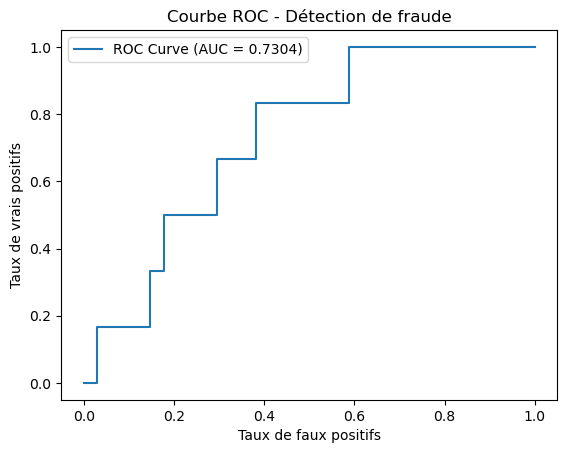

In [31]:
# Tracer la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Détection de fraude')
plt.legend()
plt.show()

####  Explication des axes :
Axe X (False Positive Rate - FPR) : Nombre de transactions non frauduleuses classées comme frauduleuses par le modèle. 
 
Axe Y (True Positive Rate - TPR) : Nombre de transactions frauduleuses correctement détectées. 

AUC=0.7304 donc il est supérieur à 0.5 donc le modéle fonctionne trés bien
